# Clustering Using Crime_data

In [43]:
import numpy as np 
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [45]:
crime=pd.read_csv("crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [46]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [47]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [48]:
crime.drop('Unnamed: 0',
  axis='columns', inplace=True)

In [49]:
crime.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [7]:
#standardize the data to normal distribution
from sklearn import preprocessing
crime_standardized = preprocessing.scale(crime)
print(crime_standardized)
crime_standardized = pd.DataFrame(crime_standardized)

[[ 1.25517927  0.79078716 -0.52619514 -0.00345116]
 [ 0.51301858  1.11805959 -1.22406668  2.50942392]
 [ 0.07236067  1.49381682  1.00912225  1.05346626]
 [ 0.23470832  0.23321191 -1.08449238 -0.18679398]
 [ 0.28109336  1.2756352   1.77678094  2.08881393]
 [ 0.02597562  0.40290872  0.86954794  1.88390137]
 [-1.04088037 -0.73648418  0.79976079 -1.09272319]
 [-0.43787481  0.81502956  0.45082502 -0.58583422]
 [ 1.76541475  1.99078607  1.00912225  1.1505301 ]
 [ 2.22926518  0.48775713 -0.38662083  0.49265293]
 [-0.57702994 -1.51224105  1.21848371 -0.11129987]
 [-1.20322802 -0.61527217 -0.80534376 -0.75839217]
 [ 0.60578867  0.94836277  1.21848371  0.29852525]
 [-0.13637203 -0.70012057 -0.03768506 -0.0250209 ]
 [-1.29599811 -1.39102904 -0.5959823  -1.07115345]
 [-0.41468229 -0.67587817  0.03210209 -0.34856705]
 [ 0.44344101 -0.74860538 -0.94491807 -0.53190987]
 [ 1.76541475  0.94836277  0.03210209  0.10439756]
 [-1.31919063 -1.06375661 -1.01470522 -1.44862395]
 [ 0.81452136  1.56654403  0.10

# K-Clustering

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


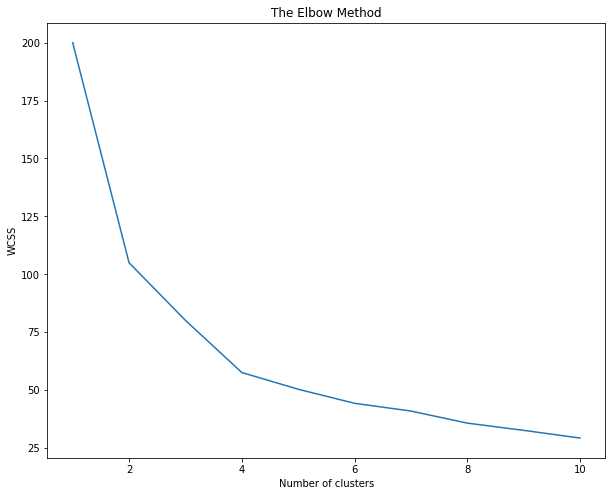

In [51]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(crime_standardized)
    wcss.append(kmeans.inertia_) #criterion based on which K-means clustering works
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [52]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(crime_standardized)

y_kmeans

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0])

In [54]:
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans+1

# New list called cluster
cluster = list(y_kmeans1)
# Adding cluster to our data set
crime['cluster'] = cluster

In [55]:
#Mean of clusters 1 to 4
kmeans_mean_cluster = pd.DataFrame(round(crime.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Murder,Assault,UrbanPop,Rape
cluster,,,,
1,5.7,138.9,73.9,18.8
2,13.9,243.6,53.8,21.4
3,10.8,257.4,76.0,33.2
4,3.6,78.5,52.1,12.2


<AxesSubplot:xlabel='Murder', ylabel='Assault'>

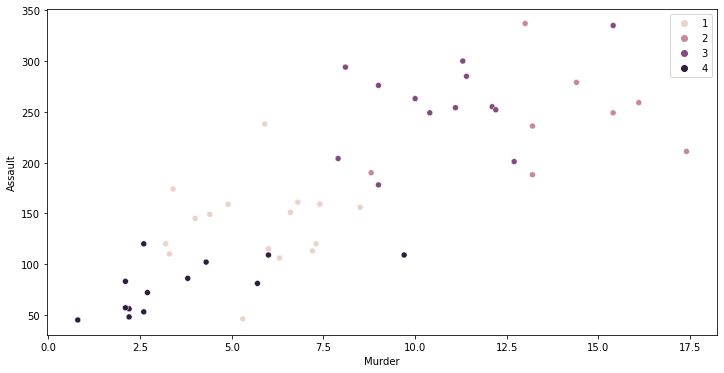

In [56]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.scatterplot(x=crime['Murder'], y = crime['Assault'],hue=y_kmeans1)

In [57]:
crime[crime['cluster']==1]

,Murder,Assault,UrbanPop,Rape,cluster
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,1
10,5.3,46,83,20.2,1
13,7.2,113,65,21.0,1
15,6.0,115,66,18.0,1
20,4.4,149,85,16.3,1
29,7.4,159,89,18.8,1
34,7.3,120,75,21.4,1
35,6.6,151,68,20.0,1
36,4.9,159,67,29.3,1


In [60]:
crime[crime['cluster']==2]

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,2
3,8.8,190,50,19.5,2
9,17.4,211,60,25.8,2
17,15.4,249,66,22.2,2
23,16.1,259,44,17.1,2
32,13.0,337,45,16.1,2
39,14.4,279,48,22.5,2
41,13.2,188,59,26.9,2


In [61]:
crime[crime['cluster']==3]

,Murder,Assault,UrbanPop,Rape,cluster
1,10.0,263,48,44.5,3
2,8.1,294,80,31.0,3
4,9.0,276,91,40.6,3
5,7.9,204,78,38.7,3
8,15.4,335,80,31.9,3
12,10.4,249,83,24.0,3
19,11.3,300,67,27.8,3
21,12.1,255,74,35.1,3
24,9.0,178,70,28.2,3
27,12.2,252,81,46.0,3


In [62]:
crime[crime['cluster']==4]

,Murder,Assault,UrbanPop,Rape,cluster
11,2.6,120,54,14.2,4
14,2.2,56,57,11.3,4
16,9.7,109,52,16.3,4
18,2.1,83,51,7.8,4
22,2.7,72,66,14.9,4
25,6.0,109,53,16.4,4
26,4.3,102,62,16.5,4
28,2.1,57,56,9.5,4
33,0.8,45,44,7.3,4
40,3.8,86,45,12.8,4


# DBSCAN Clustering

In [63]:
array=crime.values
array

array([[ 13.2, 236. ,  58. ,  21.2,   2. ],
       [ 10. , 263. ,  48. ,  44.5,   3. ],
       [  8.1, 294. ,  80. ,  31. ,   3. ],
       [  8.8, 190. ,  50. ,  19.5,   2. ],
       [  9. , 276. ,  91. ,  40.6,   3. ],
       [  7.9, 204. ,  78. ,  38.7,   3. ],
       [  3.3, 110. ,  77. ,  11.1,   1. ],
       [  5.9, 238. ,  72. ,  15.8,   1. ],
       [ 15.4, 335. ,  80. ,  31.9,   3. ],
       [ 17.4, 211. ,  60. ,  25.8,   2. ],
       [  5.3,  46. ,  83. ,  20.2,   1. ],
       [  2.6, 120. ,  54. ,  14.2,   4. ],
       [ 10.4, 249. ,  83. ,  24. ,   3. ],
       [  7.2, 113. ,  65. ,  21. ,   1. ],
       [  2.2,  56. ,  57. ,  11.3,   4. ],
       [  6. , 115. ,  66. ,  18. ,   1. ],
       [  9.7, 109. ,  52. ,  16.3,   4. ],
       [ 15.4, 249. ,  66. ,  22.2,   2. ],
       [  2.1,  83. ,  51. ,   7.8,   4. ],
       [ 11.3, 300. ,  67. ,  27.8,   3. ],
       [  4.4, 149. ,  85. ,  16.3,   1. ],
       [ 12.1, 255. ,  74. ,  35.1,   3. ],
       [  2.7,  72. ,  66. ,  14

In [64]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [65]:
db_default = DBSCAN(eps = 0.8, min_samples = 6).fit(X)
labels = db_default.labels_

In [66]:
#-1 is an noise
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        0,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0],
      dtype=int64)

In [67]:
data=pd.DataFrame(labels,columns=['db_cluster'])

In [68]:
data

,db_cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [69]:
pd.concat([crime,data],axis=1)

,Murder,Assault,UrbanPop,Rape,cluster,db_cluster
0,13.2,236,58,21.2,2,-1
1,10.0,263,48,44.5,3,-1
2,8.1,294,80,31.0,3,-1
3,8.8,190,50,19.5,2,-1
4,9.0,276,91,40.6,3,-1
5,7.9,204,78,38.7,3,-1
6,3.3,110,77,11.1,1,-1
7,5.9,238,72,15.8,1,-1
8,15.4,335,80,31.9,3,-1
9,17.4,211,60,25.8,2,-1


# Hierarchical Clustering

In [89]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [90]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(crime.iloc[:,0:])
df_norm.head()

,Murder,Assault,UrbanPop,Rape,cluster
0,0.746988,0.654110,0.440678,0.359173,0.333333
1,0.554217,0.746575,0.271186,0.961240,0.666667
2,0.439759,0.852740,0.813559,0.612403,0.666667
3,0.481928,0.496575,0.305085,0.315245,0.333333
4,0.493976,0.791096,1.000000,0.860465,0.666667


In [91]:
df_norm.drop(['cluster'], axis=1)

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [92]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch

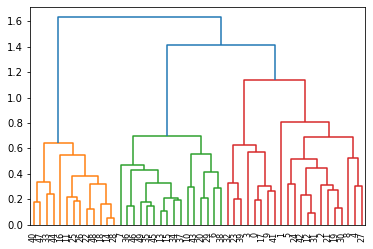

In [93]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [94]:
# create clusters
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

In [95]:
ac

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [96]:
# save clusters for chart
y_ac = ac.fit_predict(df_norm)
Clusters=pd.DataFrame(y_ac,columns=['Clusters'])

In [97]:
Clusters

,Clusters
0,3
1,4
2,2
3,3
4,2
5,2
6,0
7,0
8,2
9,3


In [109]:
df_norm['Clusters'] = ac.labels_

In [110]:
df_norm1

NameError: name 'df_norm1' is not defined

In [107]:
df_norm.drop(['cluster'], axis=1)

,Murder,Assault,UrbanPop,Rape,Clusters
0,0.746988,0.654110,0.440678,0.359173,3
1,0.554217,0.746575,0.271186,0.961240,4
2,0.439759,0.852740,0.813559,0.612403,2
3,0.481928,0.496575,0.305085,0.315245,3
4,0.493976,0.791096,1.000000,0.860465,2
5,0.427711,0.544521,0.779661,0.811370,2
6,0.150602,0.222603,0.762712,0.098191,0
7,0.307229,0.660959,0.677966,0.219638,0
8,0.879518,0.993151,0.813559,0.635659,2
9,1.000000,0.568493,0.474576,0.478036,3


<AxesSubplot:>

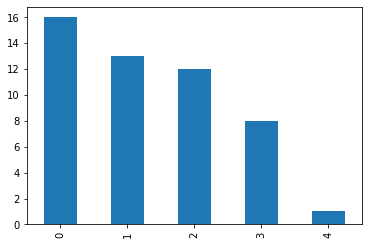

In [111]:
df_norm['Clusters'].value_counts().plot.bar()

In [112]:
df_norm.groupby('Clusters').agg(['mean']).reset_index()

,Clusters,Murder,Assault,UrbanPop,Rape,cluster
,,mean,mean,mean,mean,mean
0,0,0.292545,0.321490,0.709746,0.296673,0.000000
1,1,0.168675,0.114858,0.340287,0.126019,1.000000
2,2,0.607430,0.725742,0.785311,0.644703,0.666667
3,3,0.791416,0.680223,0.368644,0.364664,0.333333
4,4,0.554217,0.746575,0.271186,0.961240,0.666667
